In [2]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
import pandas as pd
filename = "/content/drive/MyDrive/Colab Notebooks/ProyectoOptimizacion/all_faults_dataset.csv"
df = pd.read_csv(filename)

df.describe()

,inside,R,X,V,I,rel_location,Rf
count,2.006400e+06,2.006400e+06,2.006400e+06,2.006400e+06,2.006400e+06,2.006400e+06,2.006400e+06
mean,5.899123e-02,6.870995e+16,6.886670e+16,6.740994e-01,1.401671e+00,5.000000e+01,5.000000e+00
std,2.356083e-01,4.866293e+19,4.877397e+19,2.270742e-01,1.478020e+00,3.133689e+01,3.535535e+00
min,0.000000e+00,-7.688535e+04,-3.706182e+04,8.323653e-04,6.436310e-05,1.000000e+00,0.000000e+00
25%,0.000000e+00,-6.821541e+01,-8.294042e+01,5.179271e-01,5.583650e-01,2.000000e+01,2.500000e+00
50%,0.000000e+00,3.789436e+00,4.376807e+00,7.210019e-01,9.139524e-01,5.000000e+01,5.000000e+00
75%,0.000000e+00,7.152275e+01,9.412817e+01,8.602312e-01,1.875863e+00,8.000000e+01,7.500000e+00
max,1.000000e+00,3.450000e+22,3.458704e+22,1.018221e+00,4.276524e+01,9.900000e+01,1.000000e+01


In [4]:
from sklearn.preprocessing import LabelEncoder
X = df[["Relay", "R", "X", "V", "I"]]
X.loc[:, "R"] = df[["R"]].clip(lower=-100, upper=100)
X.loc[:, "X"] = df[["X"]].clip(lower=-100, upper=100)
y = df["inside"]

le = LabelEncoder()
X.loc[:, "Relay"] = le.fit_transform(X["Relay"]).reshape(-1, 1)


<ipython-input-4-56e4e1bbeea5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, "R"] = df[["R"]].clip(lower=-100, upper=100)
<ipython-input-4-56e4e1bbeea5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, "X"] = df[["X"]].clip(lower=-100, upper=100)
<ipython-input-4-56e4e1bbeea5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [5]:

import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import ShuffleSplit, learning_curve, ParameterGrid, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import numpy as np

import time
clf = KNeighborsClassifier(
    # -----------------------------------------------------
    # Number of neighbors to use by default for kneighbors
    # queries.
    n_neighbors=5,
    # -----------------------------------------------------
    # 'auto', 'ball_tree', 'kd_tree', 'brute'
    algorithm="auto",
)

In [6]:
param_grid = [
    # -------------------------------------------------------------------------
    # Primera malla de parámetros
    {
        "n_neighbors": [2, 3],
        "weights": ["uniform"],
        "algorithm": ["ball_tree"],
    },
]

gridSearchCV = GridSearchCV(
    # --------------------------------------------------------------------------
    # This is assumed to implement the scikit-learn estimator interface.
    estimator=clf,
    # --------------------------------------------------------------------------
    # Dictionary with parameters names (str) as keys and lists of parameter
    # settings to try as values, or a list of such dictionaries
    param_grid=param_grid,
    # --------------------------------------------------------------------------
    # Determines the cross-validation splitting strategy.
    cv=5,
    # --------------------------------------------------------------------------
    # Strategy to evaluate the performance of the cross-validated model on the
    # test set.
    scoring="balanced_accuracy",
    # --------------------------------------------------------------------------
    # Refit an estimator using the best found parameters on the whole dataset.
    refit=True,
    # --------------------------------------------------------------------------
    # If False, the cv_results_ attribute will not include training scores.
    return_train_score=False,
)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.5,
    random_state=0,
)

In [ ]:
gridSearchCV.fit(X_train, y_train)

In [ ]:
best_clf=gridSearchCV.best_estimator_
best_clf,gridSearchCV.best_score_

(KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3),
 0.9827700891879131)

Text(0.5, 1.0, 'Confusion Matrix on Test Data')

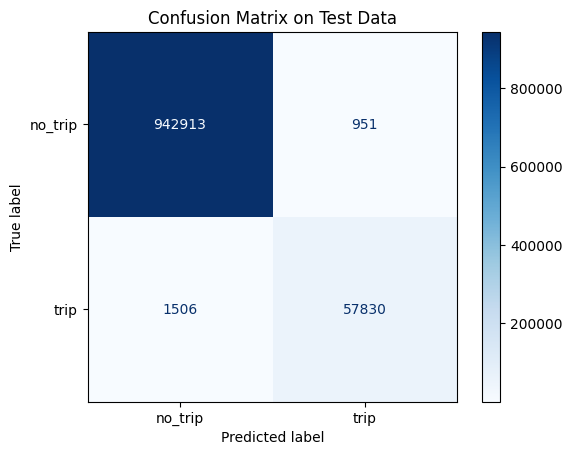

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay.from_estimator(
    best_clf,
    X_test,
    y_test,
    display_labels=["no_trip","trip"],
    cmap=plt.cm.Blues,
    normalize=None,
)

disp.ax_.set_title("Confusion Matrix on Test Data")

Text(0.5, 1.0, 'Confusion Matrix on Train Data')

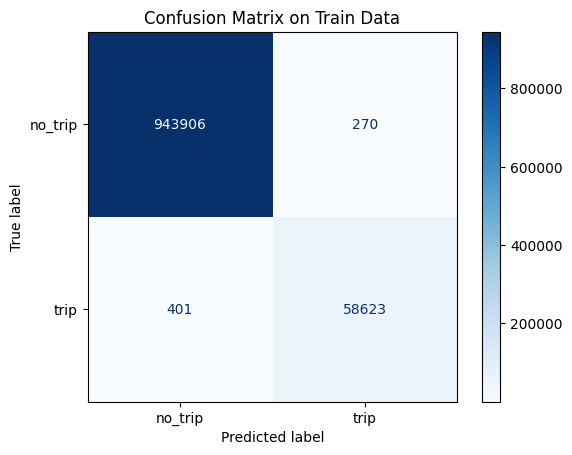

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
    best_clf,
    X_train,
    y_train,
    display_labels=["no_trip","trip"],
    cmap=plt.cm.Blues,
    normalize=None,
)

disp.ax_.set_title("Confusion Matrix on Train Data")

----
randomized search cv

In [8]:
param_grid = [
    # -------------------------------------------------------------------------
    # Primera malla de parámetros
    {
        "n_neighbors": [2, 3, 4, 5, 6],
        "weights": ["uniform", "distance"],
        "algorithm": ["ball_tree", "kd_tree", "brute"],
    },
]
randomizedSearchCV = RandomizedSearchCV(
        # --------------------------------------------------------------------------
        # This is assumed to implement the scikit-learn estimator interface.
        estimator=clf,
        # --------------------------------------------------------------------------
        # Dictionary with parameters names (str) as keys and distributions or lists
        # of parameters to try.
        param_distributions=param_grid,
        # --------------------------------------------------------------------------
        # Number of parameter settings that are sampled.
        n_iter=10,
        # --------------------------------------------------------------------------
        # Determines the cross-validation splitting strategy.
        cv=5,
        # --------------------------------------------------------------------------
        # Strategy to evaluate the performance of the cross-validated model on the
        # test set.
        scoring="balanced_accuracy",
        # --------------------------------------------------------------------------
        # Refit an estimator using the best found parameters on the whole dataset.
        refit=True,
        # --------------------------------------------------------------------------
        random_state=12345,
    )

In [ ]:
randomizedSearchCV.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions=[{'algorithm': ['ball_tree', 'kd_tree',
                                                       'brute'],
                                         'n_neighbors': [2, 3, 4, 5, 6],
                                         'weights': ['uniform', 'distance']}],
                   random_state=12345, scoring='balanced_accuracy')

In [ ]:
randomizedSearchCV.best_estimator_

KNeighborsClassifier(algorithm='brute', n_neighbors=2, weights='distance')